In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy
sns.set_style("darkgrid")
sns.set(font_scale=1.7)

In [12]:
engine = sqlalchemy.create_engine('sqlite:///stock_etf.db')

In [49]:
data = pd.read_sql_query(
    "SELECT * FROM stockData", engine, parse_dates="Date")

In [53]:
portfolio_ratios = pd.DataFrame({
    'AAPL/MSFT': (data["AAPL"]/data["MSFT"]),
    'CSCO/AES': (data["CSCO"]/data["AES"])
})

In [56]:
corr_check = portfolio_ratios.corr(method='spearman').round(2)

In [57]:
print(portfolio_ratios.corr(method='spearman').round(2))

           AAPL/MSFT  CSCO/AES
AAPL/MSFT       1.00     -0.58
CSCO/AES       -0.58      1.00


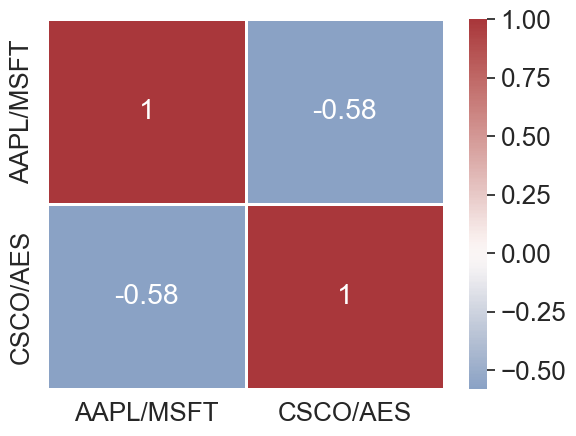

In [58]:
sns.heatmap(corr_check, annot=True, cmap="vlag", center=0, linewidths=1, linecolor="white")
plt.show()

In [15]:
data.tail(2)

,Date,AAPL,MSFT,ratio,spread
2273,2024-01-17,182.68,389.47,0.4690,-206.79
2274,2024-01-18,188.63,393.87,0.4789,-205.24


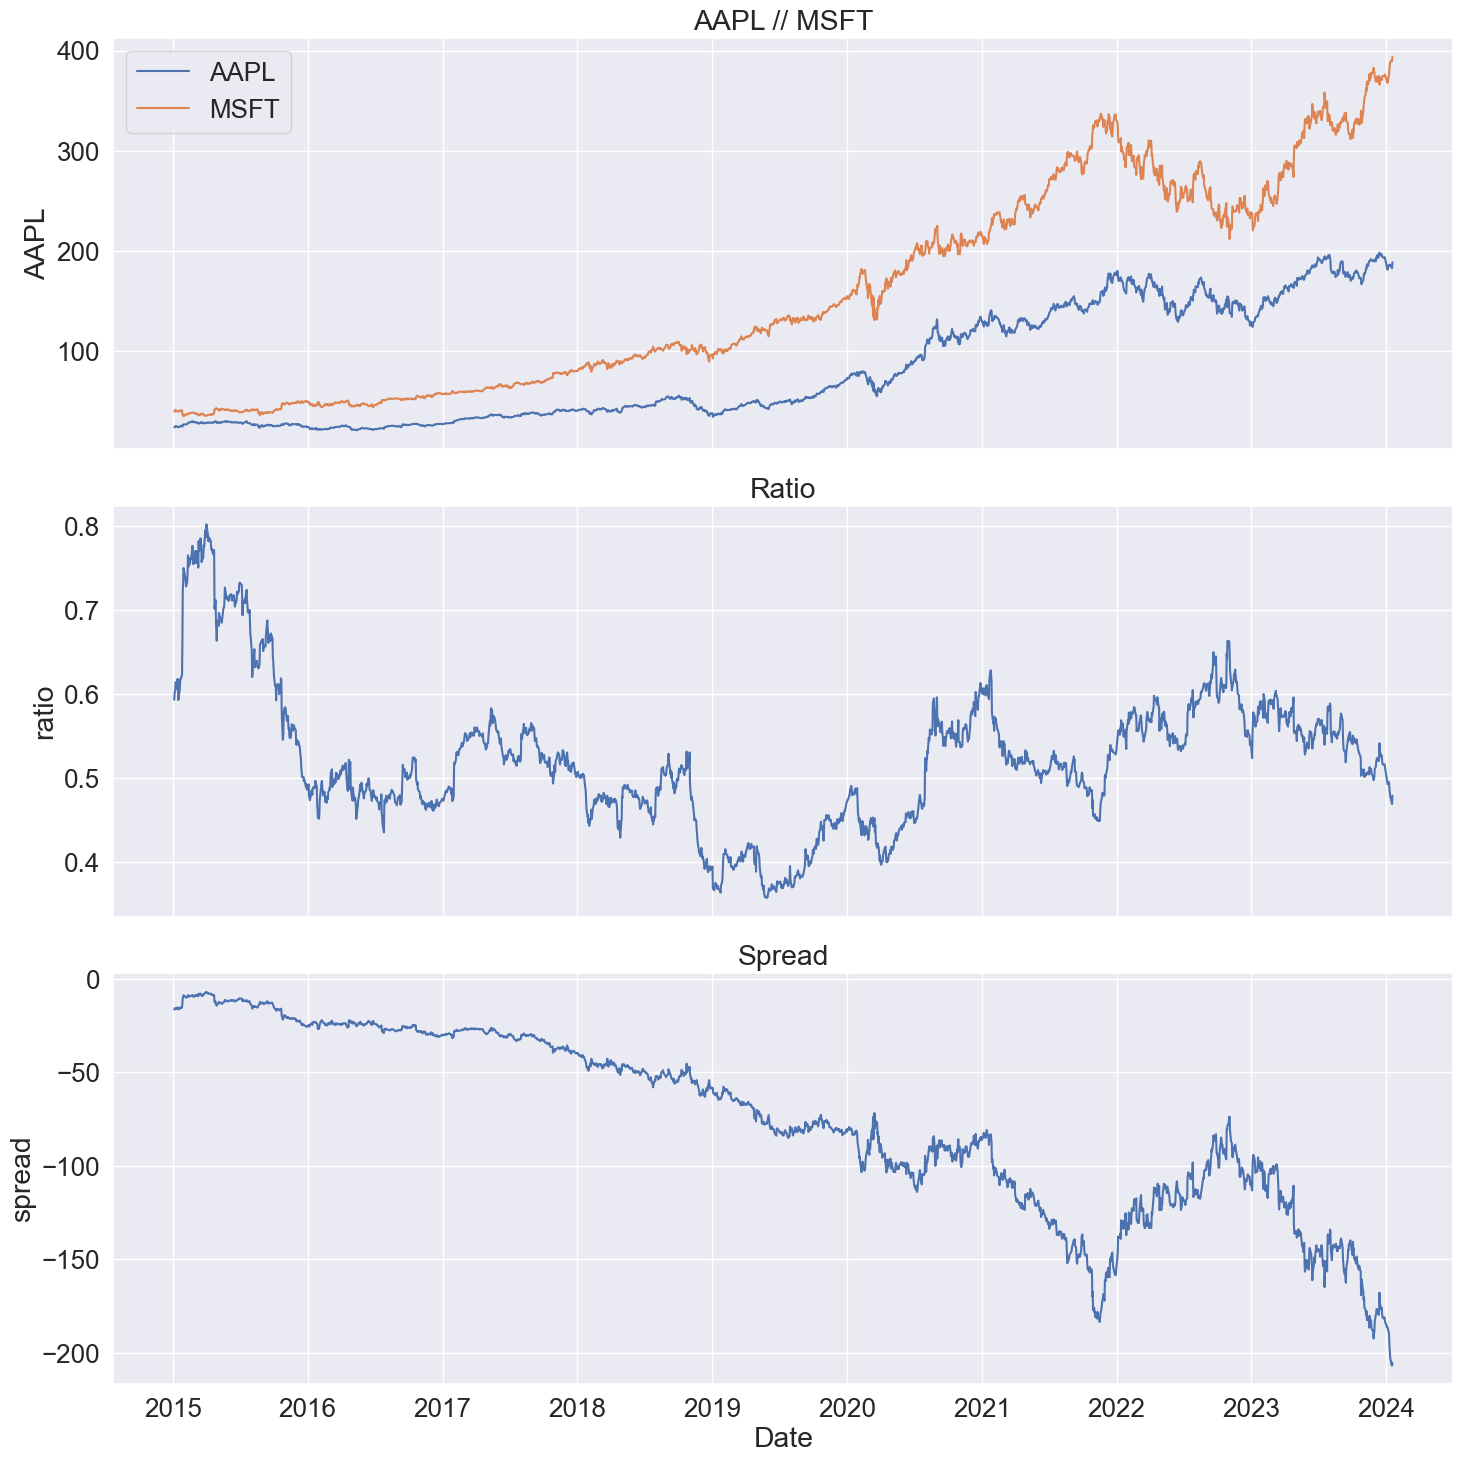

In [16]:
fig, axes = plt.subplots(3, figsize=(15, 15), sharex=True)
axes[0].set_title(
    f"{buy_ticker} // {sell_ticker}")
sns.lineplot(data=data, x="Date", y=buy_ticker,
             ax=axes[0], label=buy_ticker)
sns.lineplot(data=data, x="Date", y=sell_ticker,
             ax=axes[0], label=sell_ticker)
axes[1].set_title("Ratio")
sns.lineplot(data=data, x="Date", y="ratio", ax=axes[1])
axes[2].set_title("Spread")
sns.lineplot(data=data, x="Date", y="spread", ax=axes[2])
plt.tight_layout(pad=1)

In [17]:
fig.savefig(r'd://Trading/test/'+f"{buy_ticker}__{sell_ticker}")
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'd://Trading/test/AAPL__MSFT.png'